## Handling uncertain distributions

In [1]:
from scipy import stats
import numpy as np

In [2]:
test = stats.uniform(1,9)

In [3]:
test.rvs(20)

array([6.41079344, 5.64701279, 9.32843837, 2.83615843, 9.08735926,
       7.41230675, 9.20062323, 4.87006162, 1.48763347, 3.46850069,
       5.52750438, 2.83763363, 2.09920602, 6.87127777, 1.61199404,
       9.88811007, 5.7448679 , 4.44029802, 7.11351477, 6.04962301])

In [4]:
x = np.linspace(0,10)

In [5]:
test.pdf(x)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [6]:
from gpx.uncertainty.distributions import UniformDistribtuion

In [7]:
test2 = UniformDistribtuion(10,5)

In [8]:
test2.risk_profile()

array([-3.33333333e-03, -3.26599327e-03, -3.19865320e-03, -3.13131313e-03,
       -3.06397306e-03, -2.99663300e-03, -2.92929293e-03, -2.86195286e-03,
       -2.79461279e-03, -2.72727273e-03, -2.65993266e-03, -2.59259259e-03,
       -2.52525253e-03, -2.45791246e-03, -2.39057239e-03, -2.32323232e-03,
       -2.25589226e-03, -2.18855219e-03, -2.12121212e-03, -2.05387205e-03,
       -1.98653199e-03, -1.91919192e-03, -1.85185185e-03, -1.78451178e-03,
       -1.71717172e-03, -1.64983165e-03, -1.58249158e-03, -1.51515152e-03,
       -1.44781145e-03, -1.38047138e-03, -1.31313131e-03, -1.24579125e-03,
       -1.17845118e-03, -1.11111111e-03, -1.04377104e-03, -9.76430976e-04,
       -9.09090909e-04, -8.41750842e-04, -7.74410774e-04, -7.07070707e-04,
       -6.39730640e-04, -5.72390572e-04, -5.05050505e-04, -4.37710438e-04,
       -3.70370370e-04, -3.03030303e-04, -2.35690236e-04, -1.68350168e-04,
       -1.01010101e-04, -3.36700337e-05,  3.36700337e-05,  1.01010101e-04,
        1.68350168e-04,  

In [9]:
from gpx.uncertainty.distributions import ThreePointVariable

In [10]:
test3 = ThreePointVariable(5,10,mode=7)

In [11]:
import matplotlib.pyplot as plt

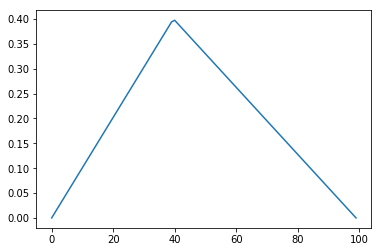

In [12]:
plt.plot(test3.get_pdf(test3.x))

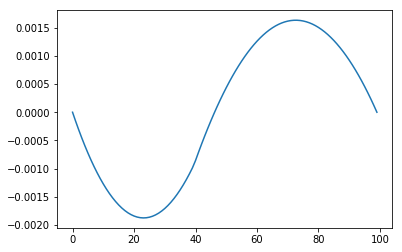

In [13]:
plt.plot(test3.risk_profile())

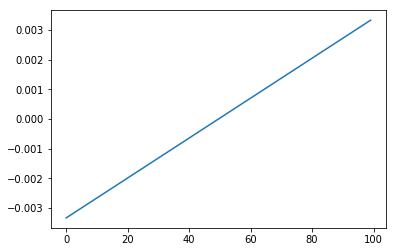

In [14]:
plt.plot(test2.risk_profile())

## create variables

In [15]:
from gpx.uncertainty.uncertain_inputs import UncertainInput

In [16]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [17]:
test = np.array((1,2,3))

In [18]:
result = bs.bootstrap(test, stat_func=bs_stats.mean)

In [19]:
vars(result)

{'lower_bound': 1.0, 'upper_bound': 3.0, 'value': 2.0}

In [20]:
result.lower_bound

1.0

## Test with gpkit model

In [21]:
from gpkit import Variable, Model

In [22]:
import gpx.uncertainty.distributions as uds

In [23]:
lam = Variable('\\lambda','count/hr')
W = Variable('W', 10, 'hr')
L = Variable('L', 3, 'count')

In [24]:
m = Model(1/lam, [lam <= L/W])

In [25]:
m.solve()

Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.0162 seconds.


{'constants': {L: 3, W: 10},
 'cost': 3.3333332932299946 <Unit('hour / count')>,
 'freevariables': {\lambda: 0.3000000036093005},
 'sensitivities': {'constants': {L: -1.0000000000000004,
   W: 1.0000000000000004},
  'cost': {\lambda: -1.0},
  'la': array([1., 1.]),
  'nu': array([1., 1.]),
  'variables': {L: -1.0000000000000004,
   W: 1.0000000000000004,
   \lambda: 4.440892098500626e-16}},
 'soltime': 0.01615142822265625,
 'variables': {L: 3, W: 10, \lambda: 0.3000000036093005}}

In [26]:
uW = UncertainInput(W, uds.UniformDistribtuion(6,10), 'process time')

In [27]:
uW = UncertainInput(W, uds.ThreePointVariable(6,10,mode=8), 'process time')

In [28]:
from gpx.uncertainty.uncertain_inputs import UncertainModel

In [29]:
um = UncertainModel(m, uW)

In [30]:
um.get_worst_case()

Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00986 seconds.


{'constants': {L: 3, W: 6.0},
 'cost': 1.9999999861504638 <Unit('hour / count')>,
 'freevariables': {\lambda: 0.500000003462384},
 'sensitivities': {'constants': {L: -1.0000000000000004,
   W: 1.0000000000000004},
  'cost': {\lambda: -1.0},
  'la': array([1., 1.]),
  'nu': array([1., 1.]),
  'variables': {L: -1.0000000000000004,
   W: 1.0000000000000004,
   \lambda: 4.440892098500626e-16}},
 'soltime': 0.009855985641479492,
 'variables': {L: 3, W: 6.0, \lambda: 0.500000003462384}}

In [31]:
um.gen_scenarios()

Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00538 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.0148 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00423 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00473 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00434 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00423 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00429 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00393 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00447 seconds.
Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00396 seconds.


In [32]:
um.boostrap_variable(uW.var, lam, gethilo=False)

{gpkit.Variable(W [hr]): [6.954955187354832,
  7.387782886057312,
  7.823850868222443],
 gpkit.Variable(\lambda [count/hr]): [0.3847992892105624,
  0.4098646190491503,
  0.4335920911219533]}

In [33]:
um.risk_eval(sum_risk=True)

Using solver 'cvxopt'
Solving for 1 variables.
Solving took 0.00513 seconds.


{'process time': {'sumRisk': '0.2222222200443446 hour / count'}}

In [34]:
import numpy as np

In [35]:
np.min([1,3])

1

In [36]:
um.risk_eval(sum_risk=True)

{'process time': {'sumRisk': '0.2222222200443446 hour / count'}}

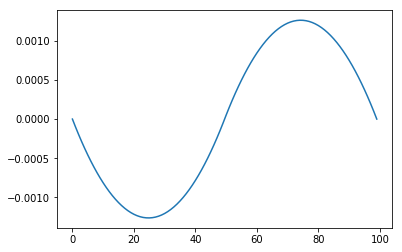

In [37]:
plt.plot(uW.uncertainty.risk_profile())

In [74]:
x = np.multiply(100.0,uW.uncertainty.percent_diff)
y = uW.uncertainty.risk_profile()

In [76]:
x = uW.uncertainty.x

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


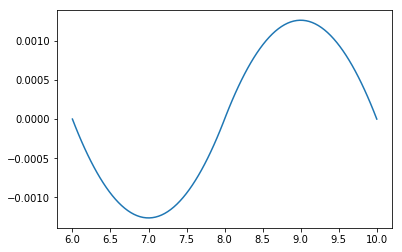

In [77]:
plt.plot(x,y)
plt.show()

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


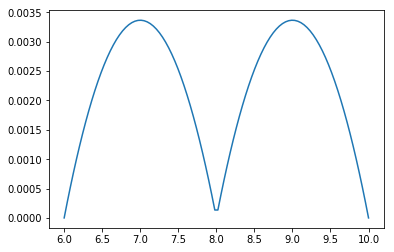

In [68]:
plt.plot(uW.uncertainty.x, uW.quantify_total_risk(um.get_likely_case()))
plt.show()

## Test one-shot

In [39]:
inputjson = '''
    {"model":{"inputs":[{"model":"Spar Design","key":"perimeter // Spar Design","unit":"m","name":"Part Perimeter"},{"model":"Spar Design","key":"length // Spar Design","unit":"m","name":"Part Length"},{"model":"Spar Design","key":"width // Spar Design","unit":"m","name":"Part Width"},{"model":"Spar Design","key":"thickness // Spar Design","unit":"m","name":"Part Thickness"},{"model":"Spar Design","key":"surfaceArea // Spar Design","unit":"m^2","name":"Total Surface Area"},{"model":"Spar Design","key":"layupArea // Spar Design","unit":"m^2","name":"Layup Area / Layer"},{"model":"Spar Design","key":"holeCount // Spar Design","unit":"count","name":"Hole Count"},{"model":"Spar Design","key":"cutoutPerimeter // Spar Design","unit":"m","name":"Cutout Perimeter"},{"model":"Spar Design","key":"curvature // Spar Design","unit":"m","name":"Part Min. Curvature Radius"},{"model":"Spar Design","sign":"=","unit":"kg","value":250,"likely":250,"name":"Part Mass"},{"model":"Prepreg (8-276)","key":"AFP Machine Head Count // Prepreg (8-276)","unit":"count","name":"AFP Machine Head Count"},{"model":"Prepreg (8-276)","key":"Autoclave Head Count // Prepreg (8-276)","unit":"count","name":"Autoclave Head Count"},{"model":"Prepreg (8-276)","key":"CNC Trim Machine Head Count // Prepreg (8-276)","unit":"count","name":"CNC Trim Machine Head Count"},{"model":"Prepreg (8-276)","sign":">=","unit":"min","math":true,"value":["Part Mass","*","Layup Rate"],"name":"Layup Time"},{"model":"Prepreg (8-276)","sign":"=","worst":5,"unit":"min/lb","value":3,"likely":3,"name":"Layup Rate","best":1},{"model":"Prepreg (8-276)","sign":">=","unit":"min","math":true,"value":["cv","*","Layup Time"],"name":"Layup Std. Dev."},{"model":"Prepreg (8-276)","sign":"=","unit":"","value":0.25,"likely":0.25,"name":"cv"},{"model":"Prepreg (8-276)","sign":"=","unit":"min","value":480,"likely":480,"name":"Cure Time"},{"model":"Prepreg (8-276)","sign":">=","unit":"min","math":true,"value":["cv","*","Cure Time"],"name":"Cure Std. Dev."},{"model":"Prepreg (8-276)","sign":"=","unit":"min","value":480,"likely":480,"name":"Trim and Drill Time"},{"model":"Prepreg (8-276)","sign":">=","unit":"min","math":true,"value":["cv","*","Trim and Drill Time"],"name":"Trim and Drill Std. Dev."},{"model":"Prepreg (8-276)","sign":"=","unit":"$","value":1000000,"likely":1000000,"name":"Layup and Cure Mandrel Tool Cost"},{"model":"Prepreg (8-276)","sign":"=","unit":"$","value":5000000,"likely":5000000,"name":"AFP Machine Cell Cost"},{"model":"Prepreg (8-276)","sign":"=","unit":"$","value":10000000,"likely":10000000,"name":"Autoclave Cell Cost"},{"model":"Prepreg (8-276)","sign":"=","unit":"$","value":1000000,"likely":1000000,"name":"CNC Trim Machine Cell Cost"}],"type":"custom","partName":"Part Name","design":{"plyBook":{"width":[[{"value":0},{"value":0}]],"stack":[[{"value":0},{"value":0}],[{"value":0},{"value":0}]],"length":[[{"value":0}],[{"value":0}]]},"designModule":"Spar Design","parameters":[]},"modules":[{"modelInputs":[{"key":"perimeter // Spar Design","unit":"m","name":"Part Perimeter"},{"key":"length // Spar Design","unit":"m","name":"Part Length"},{"key":"width // Spar Design","unit":"m","name":"Part Width"},{"key":"thickness // Spar Design","unit":"m","name":"Part Thickness"},{"key":"surfaceArea // Spar Design","unit":"m^2","name":"Total Surface Area"},{"key":"layupArea // Spar Design","unit":"m^2","name":"Layup Area / Layer"},{"key":"holeCount // Spar Design","unit":"count","name":"Hole Count"},{"key":"cutoutPerimeter // Spar Design","unit":"m","name":"Cutout Perimeter"},{"key":"curvature // Spar Design","unit":"m","name":"Part Min. Curvature Radius"},{"sign":"=","value":250,"unit":"kg","name":"Part Mass"}],"design":[{"sign":"=","value":250,"unit":"kg","name":"Part Mass"}],"type":"design","name":"Spar Design"},{"modelInputs":[{"key":"AFP Machine Head Count // Prepreg (8-276)","unit":"count","name":"AFP Machine Head Count"},{"key":"Autoclave Head Count // Prepreg (8-276)","unit":"count","name":"Autoclave Head Count"},{"key":"CNC Trim Machine Head Count // Prepreg (8-276)","unit":"count","name":"CNC Trim Machine Head Count"},{"math":true,"sign":">=","value":["Part Mass","*","Layup Rate"],"unit":"min","name":"Layup Time"},{"sign":"=","value":3,"unit":"min/lb","name":"Layup Rate"},{"math":true,"sign":">=","value":["cv","*","Layup Time"],"unit":"min","name":"Layup Std. Dev."},{"sign":"=","value":0.25,"unit":"","name":"cv"},{"sign":"=","value":480,"unit":"min","name":"Cure Time"},{"math":true,"sign":">=","value":["cv","*","Cure Time"],"unit":"min","name":"Cure Std. Dev."},{"sign":"=","value":480,"unit":"min","name":"Trim and Drill Time"},{"math":true,"sign":">=","value":["cv","*","Trim and Drill Time"],"unit":"min","name":"Trim and Drill Std. Dev."},{"sign":"=","value":1000000,"unit":"$","name":"Layup and Cure Mandrel Tool Cost"},{"sign":"=","value":5000000,"unit":"$","name":"AFP Machine Cell Cost"},{"sign":"=","value":10000000,"unit":"$","name":"Autoclave Cell Cost"},{"sign":"=","value":1000000,"unit":"$","name":"CNC Trim Machine Cell Cost"}],"type":"manufacturing","name":"Prepreg (8-276)","manufacturing":{"processTypes":[],"tools":[{"last":3,"first":1,"name":"Layup and Cure Mandrel"}],"variables":[{"math":true,"sign":">=","value":["Part Mass","*","Layup Rate"],"unit":"min","name":"Layup Time"},{"sign":"=","value":3,"unit":"min/lb","name":"Layup Rate"},{"math":true,"sign":">=","value":["cv","*","Layup Time"],"unit":"min","name":"Layup Std. Dev."},{"sign":"=","value":0.25,"unit":"","name":"cv"},{"sign":"=","value":480,"unit":"min","name":"Cure Time"},{"math":true,"sign":">=","value":["cv","*","Cure Time"],"unit":"min","name":"Cure Std. Dev."},{"sign":"=","value":480,"unit":"min","name":"Trim and Drill Time"},{"math":true,"sign":">=","value":["cv","*","Trim and Drill Time"],"unit":"min","name":"Trim and Drill Std. Dev."},{"sign":"=","value":1000000,"unit":"$","name":"Layup and Cure Mandrel Tool Cost"},{"sign":"=","value":5000000,"unit":"$","name":"AFP Machine Cell Cost"},{"sign":"=","value":10000000,"unit":"$","name":"Autoclave Cell Cost"},{"sign":"=","value":1000000,"unit":"$","name":"CNC Trim Machine Cell Cost"}],"cells":[{"id":"","workstationCapacity":1,"name":"AFP Machine"},{"id":"","workstationCapacity":1,"name":"Autoclave"},{"id":"","workstationCapacity":1,"name":"CNC Trim Machine"}],"routes":[],"processChain":[{"#":"","type":"Layup","cell":1},{"#":"","type":"Cure","cell":2},{"#":"","type":"Trim and Drill","cell":3}]}}],"manufacturing":{"quantity":1000,"process":"Prepreg (8-276)","cells":[],"line":"cell","rate":40,"processChain":[]}}}
'''

In [40]:
import json

In [41]:
inputdict = json.loads(inputjson)

In [42]:
'model' in inputdict

True

In [43]:
from interactive_generators import createModelFromDict

In [44]:
I = createModelFromDict(inputdict['model'])

INFO:root:attribute not found in while parsing JSON to object: designModule...skipping
INFO:root:attribute not found in while parsing JSON to object: plyBook...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: math...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: math...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: sign...skipping
INFO:root:attribute not found in while parsing JSON to object: math...skipping
INFO:root:attribute not found in while pa

Spar Design
Prepreg (8-276)
Spar Design
Prepreg (8-276)


In [45]:
I.generate_gpx()

INFO:root:translating the menufactuing module to gpx models for cell based system
DEBUG:root:Constraint parsing|Constraint: ['Part Mass', '*', 'Layup Rate']
DEBUG:root:Constraint parsing|Monomial: ['Part Mass', '*', 'Layup Rate']
DEBUG:root:Constraint parsing|Multiplication: ['Part Mass']
DEBUG:root:Constraint parsing|Power: [['Part Mass']]
DEBUG:root:Constraint parsing|Multiplication: ['Layup Rate']
DEBUG:root:Constraint parsing|Power: [['Layup Rate']]
DEBUG:root:Constraint parsing|Constraint: ['cv', '*', 'Layup Time']
DEBUG:root:Constraint parsing|Monomial: ['cv', '*', 'Layup Time']
DEBUG:root:Constraint parsing|Multiplication: ['cv']
DEBUG:root:Constraint parsing|Power: [['cv']]
DEBUG:root:Constraint parsing|Multiplication: ['Layup Time']
DEBUG:root:Constraint parsing|Power: [['Layup Time']]
DEBUG:root:Constraint parsing|Constraint: ['cv', '*', 'Cure Time']
DEBUG:root:Constraint parsing|Monomial: ['cv', '*', 'Cure Time']
DEBUG:root:Constraint parsing|Multiplication: ['cv']
DEBUG:roo

In [46]:
I.solve()

Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.243 seconds.


In [47]:
I.create_results()

{'AFP Machine Cell Cost': gpkit.Variable(AFP Machine Cell Cost [USD]),
 'AFP Machine Cell Queueing Time': gpkit.Variable(QNACell.Wq [min]),
 'AFP Machine Cell Time Sensitivity': gpkit.Variable(QNACell.\eta_t),
 'AFP Machine Cell Variation Sensitivity': gpkit.Variable(QNACell.\chi_{cv}),
 'AFP Machine Cell Workstations': gpkit.Variable(QNACell.m [count]),
 'AFP Machine Head Count': gpkit.Variable(AFP Machine Head Count [count]),
 'AFP Machine Subtotal Cell Cost': gpkit.Variable(CellCost.cost_{nonrecurring} [USD]),
 'Autoclave Cell Cost': gpkit.Variable(Autoclave Cell Cost [USD]),
 'Autoclave Cell Queueing Time': gpkit.Variable(QNACell1.Wq [min]),
 'Autoclave Cell Time Sensitivity': gpkit.Variable(QNACell1.\eta_t),
 'Autoclave Cell Variation Sensitivity': gpkit.Variable(QNACell1.\chi_{cv}),
 'Autoclave Cell Workstations': gpkit.Variable(QNACell1.m [count]),
 'Autoclave Head Count': gpkit.Variable(Autoclave Head Count [count]),
 'Autoclave Subtotal Cell Cost': gpkit.Variable(CellCost1.cos

In [48]:
sols = I.solutions

In [49]:
from uncertainty_generator import uncertainty_from_dict

In [50]:
import uncertainty_generator as ug

In [51]:
I.collected_variables

{'AFP Machine Cell Cost': gpkit.Variable(AFP Machine Cell Cost [USD]),
 'AFP Machine Cell Queueing Time': gpkit.Variable(QNACell.Wq [min]),
 'AFP Machine Cell Time Sensitivity': gpkit.Variable(QNACell.\eta_t),
 'AFP Machine Cell Variation Sensitivity': gpkit.Variable(QNACell.\chi_{cv}),
 'AFP Machine Cell Workstations': gpkit.Variable(QNACell.m [count]),
 'AFP Machine Subtotal Cell Cost': gpkit.Variable(CellCost.cost_{nonrecurring} [USD]),
 'Autoclave Cell Cost': gpkit.Variable(Autoclave Cell Cost [USD]),
 'Autoclave Cell Queueing Time': gpkit.Variable(QNACell1.Wq [min]),
 'Autoclave Cell Time Sensitivity': gpkit.Variable(QNACell1.\eta_t),
 'Autoclave Cell Variation Sensitivity': gpkit.Variable(QNACell1.\chi_{cv}),
 'Autoclave Cell Workstations': gpkit.Variable(QNACell1.m [count]),
 'Autoclave Subtotal Cell Cost': gpkit.Variable(CellCost1.cost_{nonrecurring} [USD]),
 'CNC Trim Machine Cell Cost': gpkit.Variable(CNC Trim Machine Cell Cost [USD]),
 'CNC Trim Machine Cell Queueing Time': 

In [52]:
sol = uncertainty_from_dict(I, inputdict['model'])

DEBUG:root:Copernicus-Engine uncertainty-generator|adding uncertainty from: Layup Rate
DEBUG:root:Copernicus-Engine uncertainty-generator|adding uvar: Layup Rate


Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.137 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.107 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.106 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.107 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.0991 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.0998 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.106 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.108 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.11 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.107 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.174 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.101 seconds.
Using solver 'cvxopt'
Solving for 46 variables.
Solving took 0.105 seconds.


In [53]:
sol

{'allVariables': [{'name': 'AFP Machine Cell Time Sensitivity',
   'sensitivity': 0.5763494263896995,
   'source': 'From Assumption',
   'unit': '',
   'value': 1.0},
  {'name': 'Autoclave Cell Time Sensitivity',
   'sensitivity': 0.3130192390869671,
   'source': 'From Assumption',
   'unit': '',
   'value': 1.0},
  {'name': 'Trim and Drill Std. Dev.',
   'sensitivity': 0.0,
   'source': 'Calculated Value',
   'unit': 'minute',
   'value': 120.00000012243281},
  {'name': 'Total Non-Recurring Cost',
   'sensitivity': 1.1102230246251565e-16,
   'source': 'Calculated Value',
   'unit': '$',
   'value': 37657566.4367096},
  {'name': 'AFP Machine Cell Cost',
   'sensitivity': 0.48480095145922497,
   'source': 'From Assumption',
   'unit': '$',
   'value': 5000000.0},
  {'name': 'Trim and Drill Time',
   'sensitivity': 0.0596370835450384,
   'source': 'From Assumption',
   'unit': 'minute',
   'value': 480.0},
  {'name': 'AFP Machine Cell Workstations',
   'sensitivity': -1.8263168755083825e

In [54]:
um.get_likely_case()

{'constants': {L: 3, W: 8.0},
 'cost': 2.6666666405321346 <Unit('hour / count')>,
 'freevariables': {\lambda: 0.3750000036751686},
 'sensitivities': {'constants': {L: -1.0000000000000004,
   W: 1.0000000000000004},
  'cost': {\lambda: -1.0},
  'la': array([1., 1.]),
  'nu': array([1., 1.]),
  'variables': {L: -1.0000000000000004,
   W: 1.0000000000000004,
   \lambda: 4.440892098500626e-16}},
 'soltime': 0.005125522613525391,
 'variables': {L: 3, W: 8.0, \lambda: 0.3750000036751686}}

In [55]:
str((120,480,480))

'(120, 480, 480)'

In [56]:
np.float_(np.array([1,2,3])).tolist()

[1.0, 2.0, 3.0]

In [62]:
uW.quantify_total_risk(um.get_likely_case(), bs_stats.mean)

In [65]:
x = [1,2,3]
y = ['a','b','c']
zip(x,y)
for x,y in zip(x,y):
    print(x,y,sep=',')

1,a
2,b
3,c


In [80]:
import numpy

In [83]:
numpy.round(numpy.array([1.6546468468, 2.64984684]),2).tolist()

[1.65, 2.65]

In [79]:
np.round_(np.array([1.6546546, 2.6846848], decimals=2))

TypeError: 'decimals' is an invalid keyword argument for this function

In [85]:
t = Variable('t')

In [86]:
import numbers